In [12]:
conda activate dsi_participant


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


Data reference: https://data.ontario.ca/dataset/aggregated-ontario-greenhouse-vegetable-production/resource/ab6ecf23-e711-48c8-ba61-5cae07a3dc3f.

In [1]:
import pandas as pd

# If the file is in the same folder:
df = pd.read_csv("/Users/minamahdian/Desktop/Documents/DSI folder /visualization/data1.csv")

# Show the first few rows
df.head()

,Year,Harvested Area (square feet),Harvested Area (acres),Production ('000 lbs),Production (tonnes),Farm Value ($ '000),Average Price (cents/lb),Average Price ($/tonne)
0,2024,"55,389,902","1,272","268,676","121,870","435,510",162.1,"3,574"
1,2023,"56,301,487","1,293","262,998","119,294","420,597",159.9,"3,526"
2,2022,"49,855,431","1,145","234,364","106,306","371,975",158.7,"3,499"
3,2021,"47,475,516","1,090","229,716","104,198","353,763",154.0,"3,395"
4,2020,"44,701,169","1,026","230,724","104,655","344,637",149.4,"3,293"


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

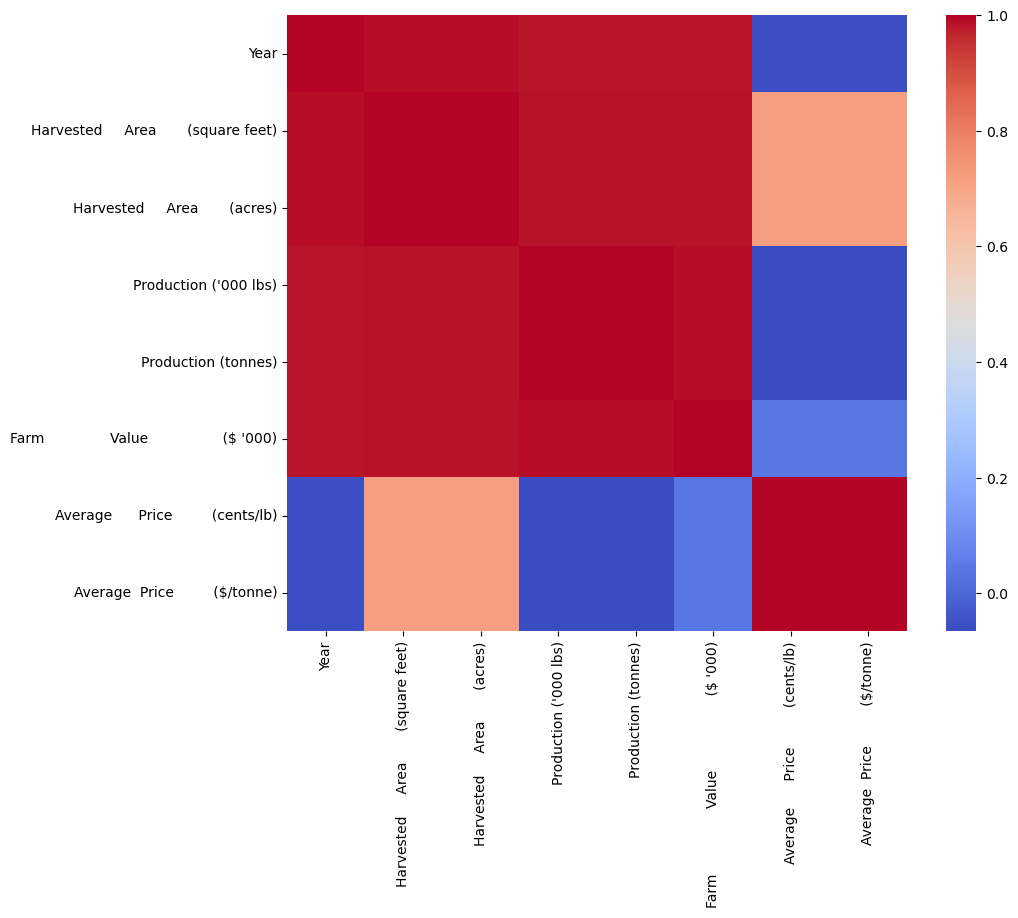

In [4]:
# Assuming 'df' is your DataFrame

# Replace commas in numeric columns and convert to numeric
for column in df.columns:
    # Check if the column dtype is object (likely string) before applying .str
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')
    else:
        # If not an object dtype, try converting directly to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

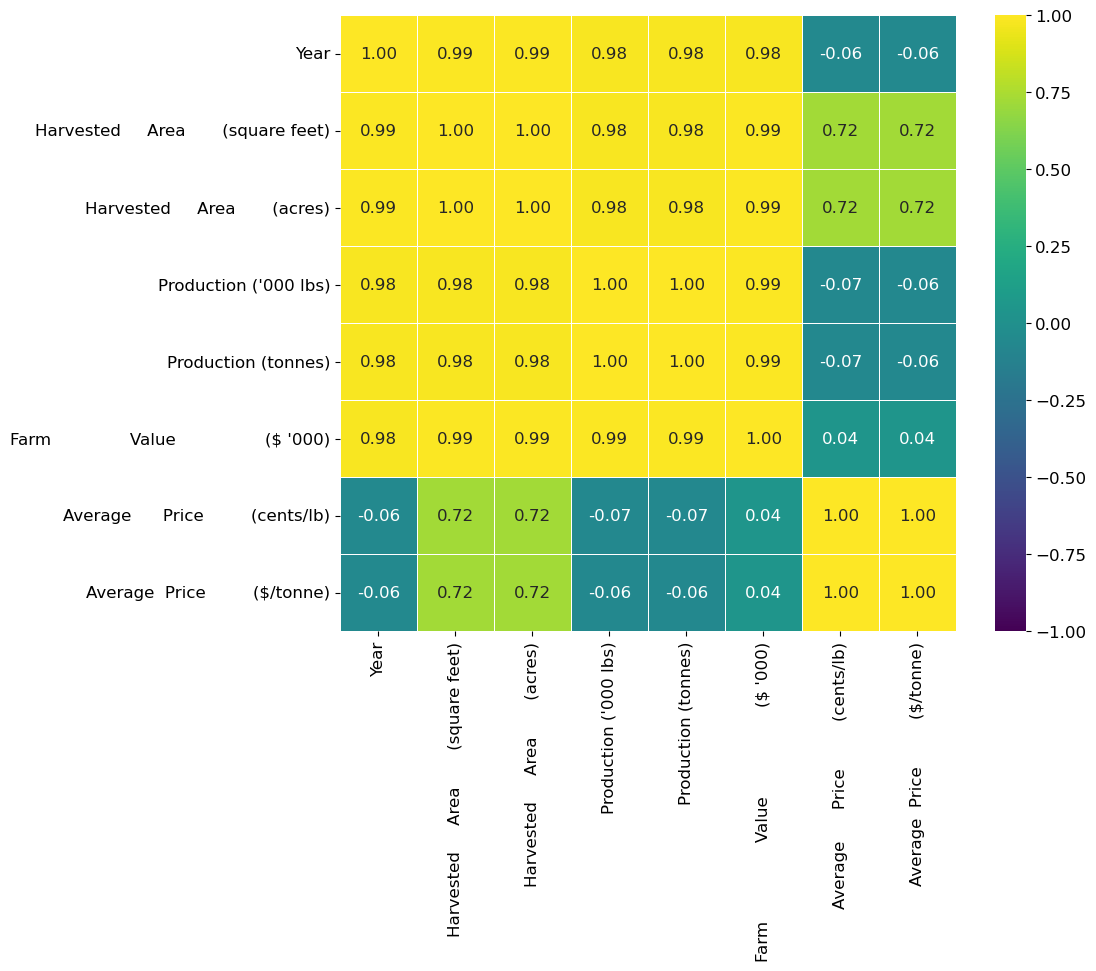

In [5]:
# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [7]:
#Correct the name of the coloumn 
print(df.columns)

Index(['Year', 'Harvested     Area       (square feet)',
       'Harvested     Area       (acres)', 'Production ('000 lbs)',
       'Production (tonnes)',
       'Farm               Value                 ($ '000)',
       'Average      Price         (cents/lb)',
       'Average  Price         ($/tonne)'],
      dtype='object')


In [19]:
df.rename(columns={"Harvested     Area       (square feet)": "HarvestedArea(ft2)", "Production (tonnes)": "Production (tonnes)","Average  Price         ($/tonne)":"Price($/tonne)","Harvested     Area       (acres)":"Harvested area (acres)"}, inplace=True)

In [20]:
print(df.columns)

Index(['Year', 'HarvestedArea(ft2)', 'Harvested area (acres)',
       'Production ('000 lbs)', 'Production (tonnes)', 'Farm value ($)',
       'Price (cents/lb)', 'Price($/tonne)'],
      dtype='object')


In [21]:
print(df.columns)

Index(['Year', 'HarvestedArea(ft2)', 'Harvested area (acres)',
       'Production ('000 lbs)', 'Production (tonnes)', 'Farm value ($)',
       'Price (cents/lb)', 'Price($/tonne)'],
      dtype='object')


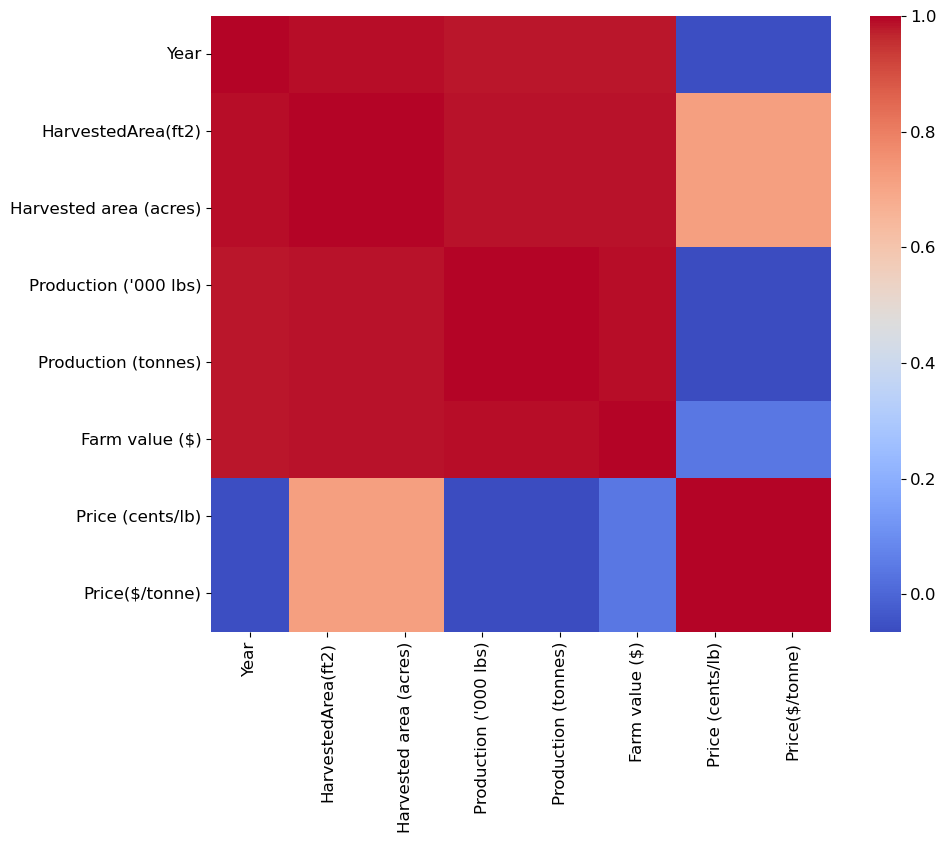

In [22]:
# Assuming 'df' is your DataFrame

# Replace commas in numeric columns and convert to numeric
for column in df.columns:
    # Check if the column dtype is object (likely string) before applying .str
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')
    else:
        # If not an object dtype, try converting directly to numeric
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

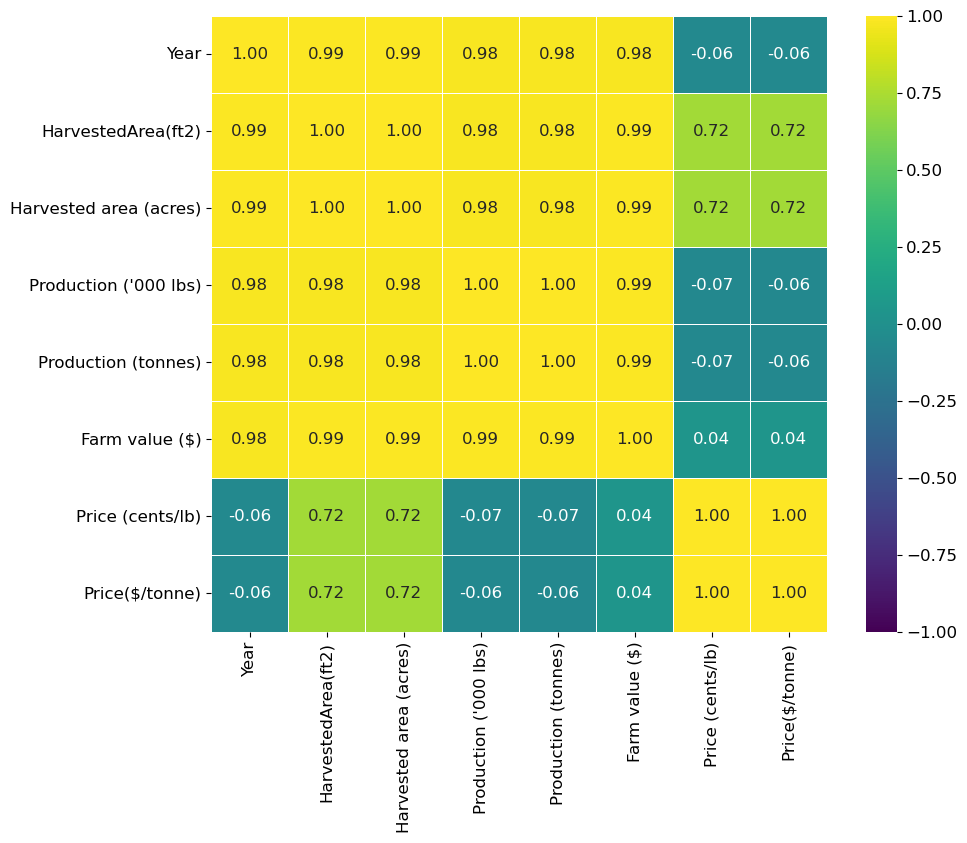

In [23]:
# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [24]:
df.rename(columns={"Farm               Value                 ($ '000)": "Farm value ($)", "Average      Price         (cents/lb)": "Price (cents/lb)"}, inplace=True)

In [25]:
# visulize Harvested area, Production(tonnes), and Average Price ($/tonne)
# Create a new dataset with selected columns
df1 = df[["HarvestedArea(ft2)", "Production (tonnes)", "Price($/tonne)"]]

# View the new DataFrame
df1.head()

,HarvestedArea(ft2),Production (tonnes),Price($/tonne)
0,55389902.0,121870,3574
1,56301487.0,119294,3526
2,49855431.0,106306,3499
3,47475516.0,104198,3395
4,44701169.0,104655,3293


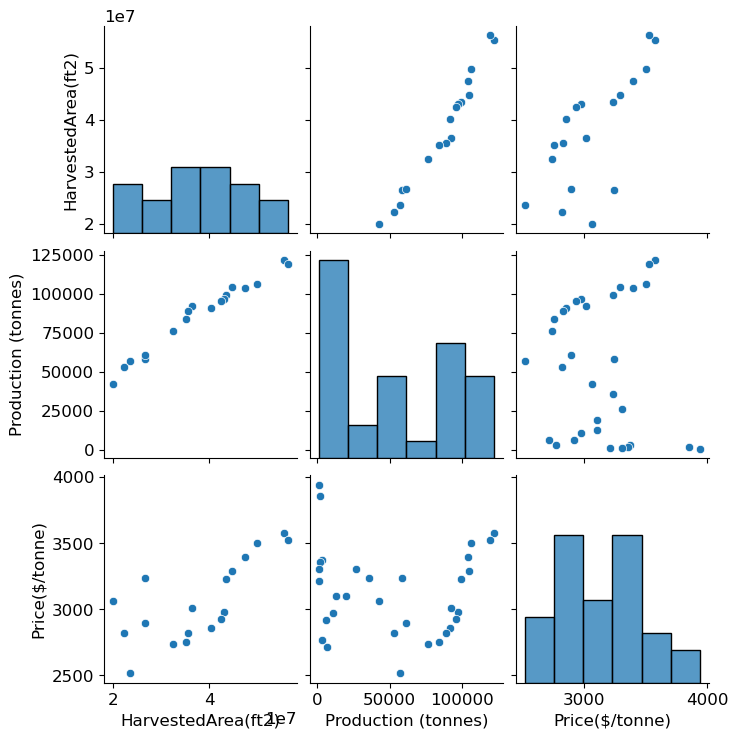

In [26]:
import seaborn as sns

sns.pairplot(df1)

In [31]:
# Visulize the chang in price and harvested area in Ontario from (1994-2024)
df2 = df[[ "Year","HarvestedArea(ft2)", "Price($/tonne)"]]

# View the new DataFrame
df2.head()

,Year,HarvestedArea(ft2),Price($/tonne)
0,2024,55389902.0,3574
1,2023,56301487.0,3526
2,2022,49855431.0,3499
3,2021,47475516.0,3395
4,2020,44701169.0,3293


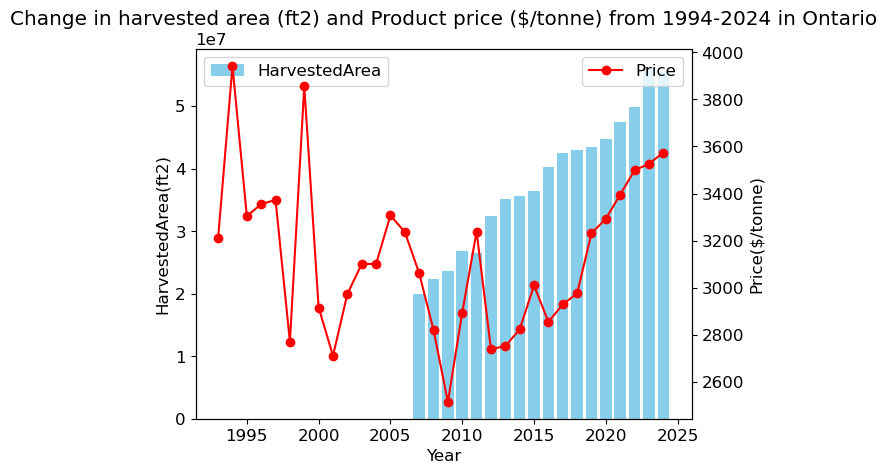

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax1 = plt.subplots()

# Bar plot (left y-axis)
ax1.bar(df2['Year'], df2['HarvestedArea(ft2)'], color='skyblue', label='HarvestedArea')
ax1.set_ylabel('HarvestedArea(ft2)')
ax1.set_xlabel('Year')

# Second y-axis
ax2 = ax1.twinx()

# Scatter plot (right y-axis)
ax2.plot(df2['Year'], df2['Price($/tonne)'], 'o-', color='red', label='Price')
ax2.set_ylabel('Price($/tonne)')

# Optional: Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Change in harvested area (ft2) and Product price ($/tonne) from 1994-2024 in Ontario')
plt.show()


This plot shows the harvested area and price of vegetables in Ontario from 1994 to 2024. Data for harvested area is unavailable from 1994 to 2006, but from 2007 onward, there has been a general increase in harvested area. Vegetable prices peaked in 1995 and 1999, while 2009 recorded the lowest price during the observed period.